## Practice dataset: Airlines Arrival

Use this dataset of airline arrival information to predict how late flights will be. A flight only counts as late if it is more than 30 minutes late.

Primary question: 
- Outcome of interest: Whether an arriving flight will be on time or delayed. 


Secondary outcomes: 
- When is a good time to fly or when flights are least delayed? 
- List of  airlines that are more prone to delay? 
- What are the primary factors that cause/ related to delay? 

In [217]:
# Import libraries

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import sklearn models 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

# Time 
from time import time


In [105]:
df = pd.read_csv('2008.csv')

In [3]:
df.shape # 7 mln datapoints, 29 variables including the outcome variable
#random sampling to 25% for computational efficiency

(7009728, 29)

In [109]:
sample = df.sample(frac=0.25, replace=True, random_state=111)

In [110]:
sample.shape  # 1.75 mln datapoints, 29 variables

(1752432, 29)

In [111]:
sample.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3616596,2008,7,6,7,649.0,655,807.0,815,WN,468,...,8.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6945644,2008,12,7,7,834.0,835,1403.0,1430,AS,20,...,6.0,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4728788,2008,8,4,1,1954.0,1715,129.0,2250,AA,794,...,8.0,25.0,0,NaN,0,0.0,0.0,2.0,0.0,157.0
4330196,2008,8,18,1,1326.0,1335,1427.0,1442,XE,430,...,4.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2199638,2008,4,24,4,2017.0,1910,2209.0,2055,MQ,4502,...,5.0,22.0,0,NaN,0,36.0,0.0,7.0,0.0,31.0


In [112]:
sample.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1752432.0,1.752432e+06,1.752432e+06,1.752432e+06,1.718472e+06,1.752432e+06,1.714614e+06,1.752432e+06,1.752432e+06,1.713870e+06,...,1.752432e+06,1.714614e+06,1.718263e+06,1.752432e+06,1.752432e+06,380791.000000,380791.000000,380791.000000,380791.000000,380791.000000
mean,2008.0,6.377964e+00,1.573477e+01,3.924709e+00,1.333708e+03,1.326068e+03,1.481187e+03,1.494558e+03,2.224662e+03,1.272535e+02,...,7.258026e+02,6.859805e+00,1.644132e+01,1.955568e-02,2.449168e-03,15.834156,3.048412,17.235055,0.071422,20.729319
std,0.0,3.407132e+00,8.795838e+00,1.989233e+00,4.781821e+02,4.642054e+02,5.050018e+02,4.824917e+02,1.961511e+03,7.014678e+01,...,5.616410e+02,4.930965e+00,1.133278e+01,1.384676e-01,4.942844e-02,39.950477,19.148238,32.173666,1.887592,39.117848
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.600000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.090000e+02,...,5.800000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,6.000000,0.000000,0.000000
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.906000e+03,3.518000e+03,1.570000e+02,...,9.510000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,16.000000,0.000000,21.000000,0.000000,26.000000
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.741000e+03,1.379000e+03,...,4.962000e+03,2.330000e+02,4.290000e+02,1.000000e+00,1.000000e+00,1552.000000,1148.000000,1357.000000,392.000000,925.000000


In [113]:
sample.columns #'ArrDelay' is the variable of interest, value in minutes

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [114]:
sample.ArrDelay.describe() #ArrDelay in -ve value means arrived early, should be excluded for delay prediction? 

count    1.713870e+06
mean     8.169415e+00
std      3.843001e+01
min     -8.700000e+01
25%     -1.000000e+01
50%     -2.000000e+00
75%      1.200000e+01
max      1.583000e+03
Name: ArrDelay, dtype: float64

In [115]:
sample = sample[sample.ArrDelay >=1]

In [116]:
# sns.distplot(sample.ArrDelay) # column has null values 

# All flights that are cancelled or diverted had null values, but with selecting the subset above the null values are averted. 
# No delayed flights were cancelled or diverted
sample.groupby(['Cancelled', 'Diverted'])['ArrDelay'].describe()


,,count,mean,std,min,25%,50%,75%,max
Cancelled,Diverted,,,,,,,,
0,0,744484.0,32.207029,47.994276,1.0,6.0,15.0,38.0,1583.0


In [8]:
# Dropping rows of 'Cancelled' and 'Diverted' flights
#sample = sample[(sample.Cancelled==0) & (sample.Diverted==0)]

In [117]:
sample[['ArrDelay', 'ArrTime', 'CRSArrTime']].head()

,ArrDelay,ArrTime,CRSArrTime
4728788,159.0,129.0,2250
2199638,74.0,2209.0,2055
1732726,51.0,1731.0,1640
3905490,51.0,2050.0,1959
168903,20.0,1038.0,1018


In [118]:
sample.ArrDelay.isnull().sum()  # now no null values for Arrival Delay

sample.isnull().sum() # this also removes other null values 

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode     744484
Diverted                  0
CarrierDelay         363693
WeatherDelay         363693
NASDelay             363693
SecurityDelay        363693
LateAircraftDelay    363693
dtype: int64

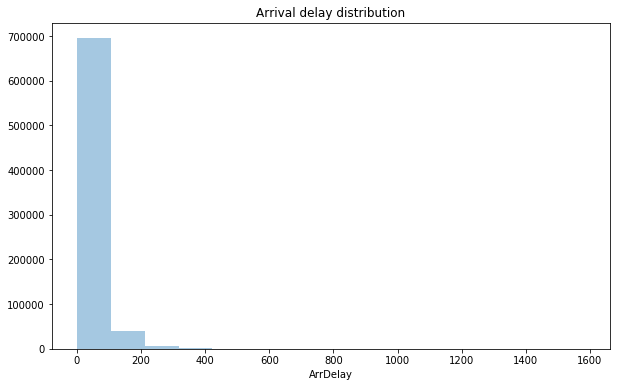

In [120]:
plt.figure(figsize=(10,6))
sns.distplot(sample.ArrDelay, bins=15, kde=False)
plt.title('Arrival delay distribution')
plt.show()

(-10, 720)

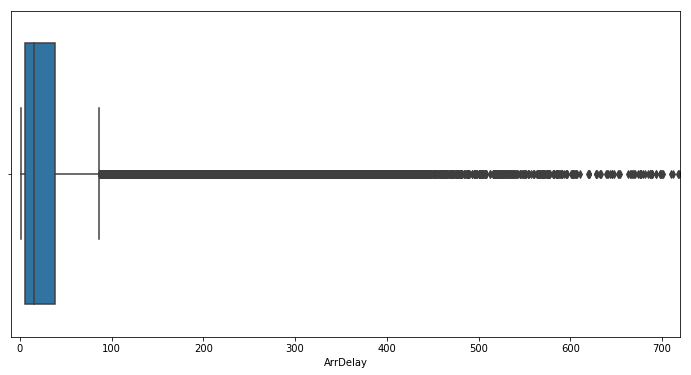

In [123]:
plt.figure(figsize=(12,6))
sns.boxplot(sample.ArrDelay)
plt.xlim(-10,720)

# Most delays are within the first 100 minutes. 
# Any delay more than one day (1440 mins) is unlikely and has special circumstances. Outlier. 

### Exploratory Data Analysis and Visualization

Let's take a look at how arrival delay is related to other variables. 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


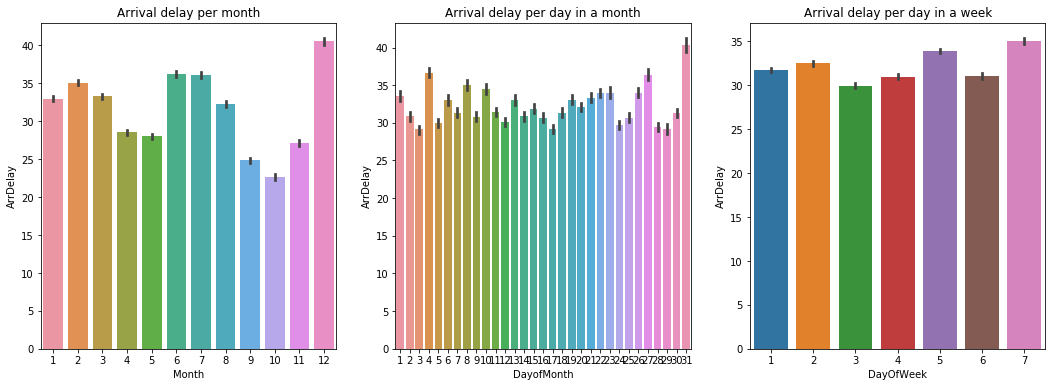

In [34]:
# Arrival delay and time

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.barplot(data=sample, x='Month', y='ArrDelay')
plt.title('Arrival delay per month')

plt.subplot(1,3,2)
sns.barplot(data=sample, x='DayofMonth', y='ArrDelay')
plt.title('Arrival delay per day in a month')


plt.subplot(1,3,3)
sns.barplot(data=sample, x='DayOfWeek', y='ArrDelay')
plt.title('Arrival delay per day in a week')
plt.show()


- Flights in December are delayed the most, while flights in September, October and November are generally delayed less. 

- Days are not a good indicator of arrival delay. 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


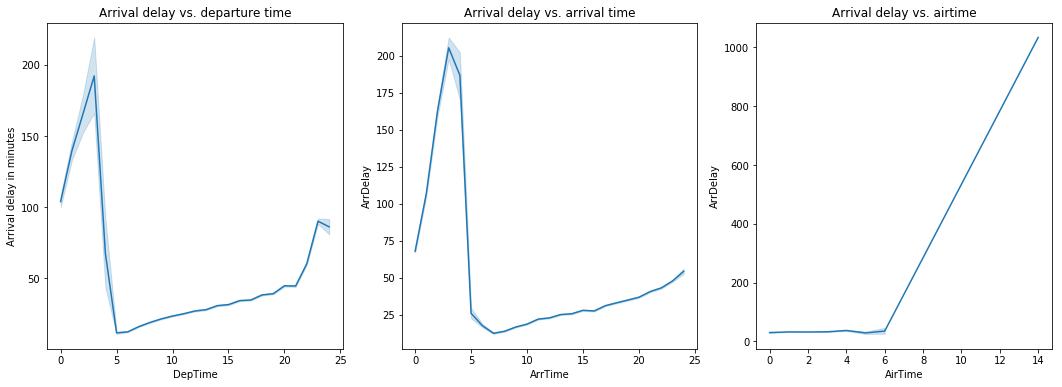

In [125]:
# Arrival delay and time

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
# DepTime in hhmm format, divided by 100 and rounded to 0 to extract the hours.
sns.lineplot(x=round(sample.DepTime/100, 0), y=sample.ArrDelay, markers=True) 
plt.ylabel('Arrival delay in minutes')
plt.title('Arrival delay vs. departure time')


plt.subplot(1,3,2)
sns.lineplot(x=round(sample.ArrTime /100, 0), y=sample.ArrDelay, markers=True)
plt.title('Arrival delay vs. arrival time')


plt.subplot(1,3,3)
sns.lineplot(x=round(sample.AirTime/100, 0), y=sample.ArrDelay, markers=True)
plt.title('Arrival delay vs. airtime')
plt.show()


- Flights departing and arriving between midnight and 5 am are delayed the most. 

- Flights with longer than 6 hours of airtime also arrived delayed. The longer the airtime, longer is the propensity of the delay. 

In [17]:
sample.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [126]:
# Checking the relation between arrival and other types of delays. 
delay_variables = sample[['ArrDelay','DepDelay', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]

In [128]:
delay_variables.isnull().sum() # 36k null values, no delay = 0 delay, filling the null values with 0

delay_variables = delay_variables.fillna(0)

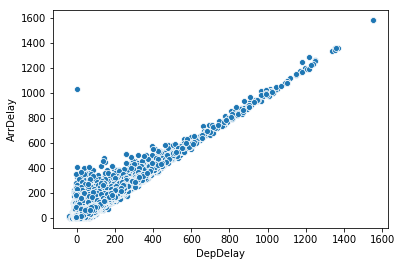

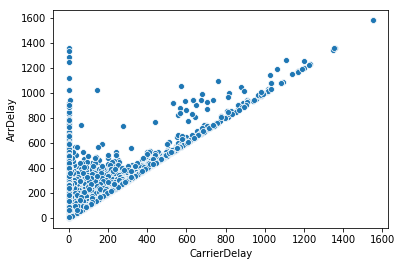

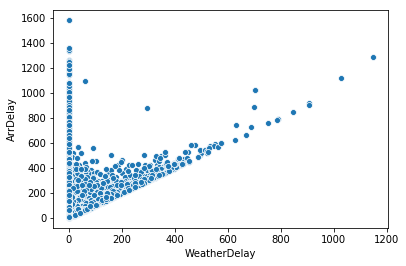

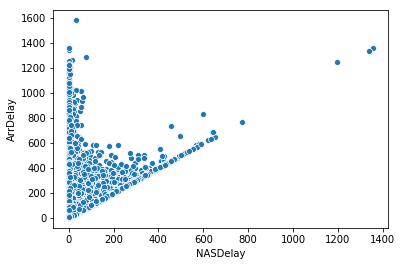

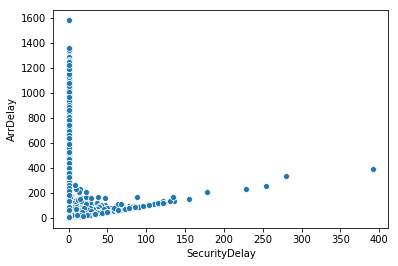

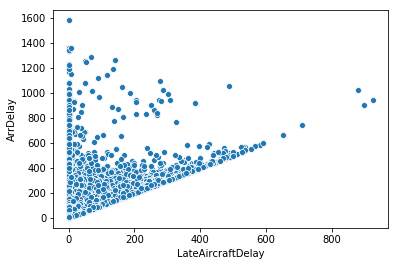

In [129]:
for col in delay_variables.columns[1:]:
 #   print(col)
    sns.scatterplot(data=delay_variables, y='ArrDelay', x=col)
    plt.show()
    
# DepDelay, CarrierDelay and LateAircraftDelay seem to be correlated with ArrDelay.

In [131]:
# Reassigning delay_Variables
#delay_variables = sample[['ArrDelay','DepDelay', 'CarrierDelay','LateAircraftDelay']]

In [52]:
#delay_variablesq = delay_variables.fillna(0)  # fill missing delay variables with 0 as 
# missing delay value = no delay = 0 delay 

In [132]:
##plt.figure(figsize=(12,8))
#
##Declare scatterplot matrix
#g = sns.PairGrid(delay_variablesq, diag_sharey=False)
#
##Set upper matrix to scatter
#g.map_upper(plt.scatter, alpha=.5)
#
##Set lower matrix to regression lines
#g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
#
##Set diagonals to distribution plot
#g.map_diag(sns.distplot)
#plt.show()

In [133]:
# Selecting a subset with arrival delay wrt carrier, origin and destination
sample_1 = sample[['ArrDelay', 'UniqueCarrier', 'FlightNum', 'TailNum', 'Origin', 'Dest']]

# Selecting only positive delays, not early arrivals (in negative values)
sample_1 = sample_1[sample_1.ArrDelay >= 0]

In [134]:
sample_1.head()

,ArrDelay,UniqueCarrier,FlightNum,TailNum,Origin,Dest
4728788,159.0,AA,794,N4WPAA,LAS,ORD
2199638,74.0,MQ,4502,N626AE,ORD,AZO
1732726,51.0,B6,87,N651JB,JFK,SLC
3905490,51.0,US,1712,N713UW,FLL,DCA
168903,20.0,OH,5360,N786CA,ORD,JFK


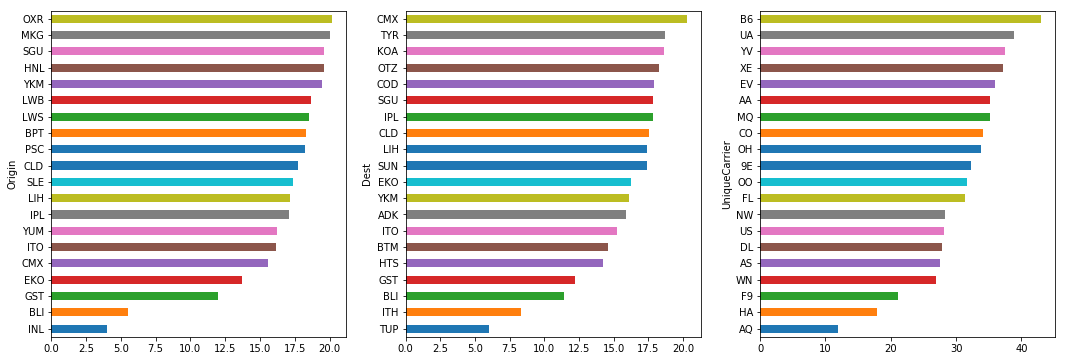

In [147]:
# Top 20 delay values for origin airport, destination airport and unique carrier. 

plt.figure(figsize=(18,6))

for col, subplt in zip(['Origin', 'Dest', 'UniqueCarrier'], [1,2,3]):
    plt.subplot(1,3,subplt)
    sample_1.groupby([col])['ArrDelay'].mean().sort_values(ascending=True).head(20).plot(kind='barh')
    plt.show()

In [172]:
# Airport traffic

(sample.groupby(['Origin'])['DayofMonth'].count()/30).sort_values(ascending=False).head()

Origin
ATL    1690.033333
ORD    1400.266667
DFW    1119.533333
DEN     917.800000
LAX     722.133333
Name: DayofMonth, dtype: float64

Text(0.5,0,'Number of flights arriving everyday')

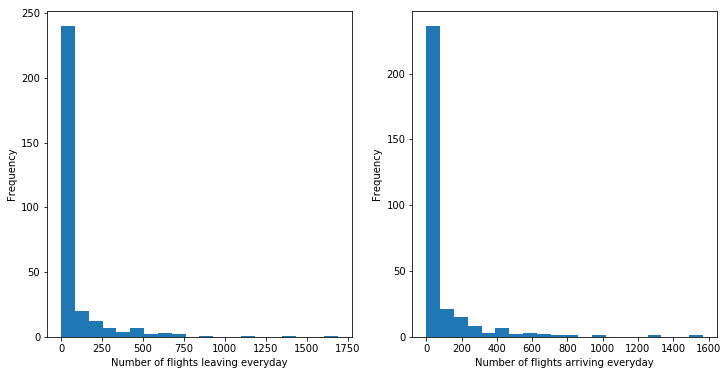

In [198]:
# How many flights per each airport 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
(sample.groupby(['Origin'])['DayofMonth'].count()/30).plot(kind='hist', bins=20)
plt.xlabel('Number of flights leaving everyday')

plt.subplot(1,2,2)
(sample.groupby(['Dest'])['DayofMonth'].count()/30).plot(kind='hist', bins=20)
plt.xlabel('Number of flights arriving everyday')
# There is a large number of airports where small numbers of flights operate everyday.

# These are probably the same airports and we can create a few feature in terms of airport traffic.

In [200]:
# select a subset of columns - removing features that are not relevant

sample = sample.drop(['Year', 'Cancelled', 'CancellationCode', 'Diverted'], 
                    axis=1)


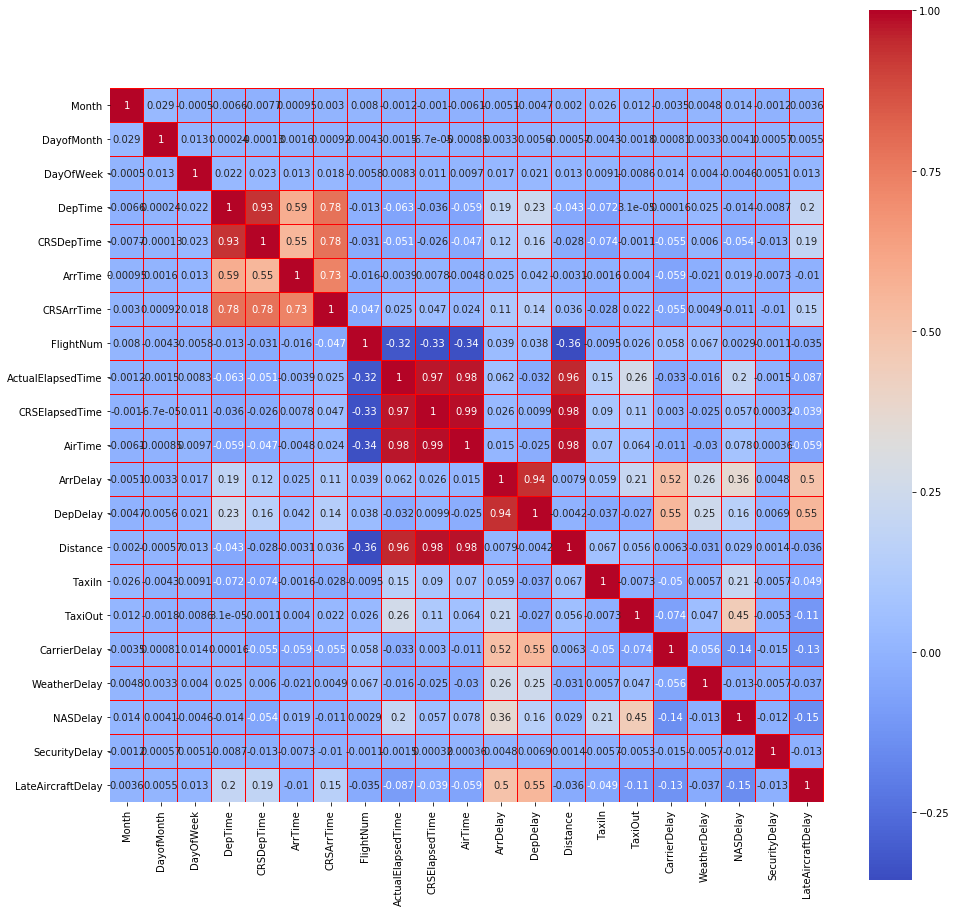

In [201]:
# Let's look at the correlations among the variables

plt.figure(figsize=(16,16))
sns.heatmap(sample.corr(), cmap='coolwarm', square=True, annot=True, 
            linecolor='red', vmax=1, linewidth=.1)

**Feature correlation summary**

- Arrival delay is highly correlated with departure delay (expected). 
- All respective CRS values are highly correlated with actual values. Drop them. 
- Distance is higly correlated with Elapsed time and air time. Since airtime is an indicator of distance, remove distance.  



## Running models to see the baseline accuracy

In [202]:
# creating the y variable for classification. 
# Required criterion: A flight only counts as late if it is more than 30 minutes late.

sample['y'] = np.where(sample['ArrDelay']>30, 1, 0)

In [203]:
# Creating X and y

X = sample.drop('y', axis=1)
y = sample.y

In [205]:
# checking for null values 

X.isnull().sum()

# All delay values have same null values, filling those with 0 as no delay = 0 delay 

X = X.fillna(0)

In [207]:
# Checking null values again 
#X.isnull().sum()

In [208]:
# Also checking for string values 

X.describe()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,744484.000000,744484.000000,744484.000000,744484.000000,744484.000000,744484.000000,744484.000000,744484.000000,744484.000000,744484.000000,...,744484.000000,744484.000000,744484.000000,744484.000000,744484.000000,744484.000000,744484.000000,744484.000000,744484.000000,744484.000000
mean,6.145266,15.730671,3.940463,1411.134759,1381.291570,1538.807612,1550.908318,2191.716539,137.935906,132.267978,...,32.207029,26.539102,753.251676,7.657747,20.296513,8.098903,1.559211,8.815440,0.036531,10.602697
std,3.459580,8.770594,1.981045,478.646452,454.693819,532.364218,478.351572,1957.282173,73.710558,71.024434,...,47.994276,48.191011,573.951186,6.193651,14.947165,29.647832,13.778955,24.569923,1.350440,29.833592
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,16.000000,-141.000000,...,1.000000,-42.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,8.000000,2.000000,1025.000000,1010.000000,1156.000000,1200.000000,614.000000,84.000000,80.000000,...,6.000000,0.000000,335.000000,4.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,16.000000,4.000000,1431.000000,1405.000000,1611.000000,1605.000000,1537.000000,120.000000,115.000000,...,15.000000,10.000000,595.000000,6.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,23.000000,6.000000,1814.000000,1745.000000,1953.000000,1937.000000,3447.000000,170.000000,162.000000,...,38.000000,34.000000,986.000000,9.000000,24.000000,0.000000,0.000000,6.000000,0.000000,0.000000
max,12.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2359.000000,9740.000000,1379.000000,660.000000,...,1583.000000,1552.000000,4962.000000,233.000000,429.000000,1552.000000,1148.000000,1357.000000,392.000000,925.000000


In [209]:
# train test split 
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=.3, random_state=101)

In [210]:
X_tr.shape
y_tr.shape
X_ts.shape
y_ts.shape

(223346,)

In [211]:
# Class imbalance

print('values of y: \n', y_tr.value_counts())
print('% of late arrival: ',len(y_tr[y_tr==1])/len(y_tr))
# 30% is not terribly imbalanced


values of y: 
 0    363388
1    157750
Name: y, dtype: int64
% of late arrival:  0.3027029308935445


In [215]:
X_tr.UniqueCarrier.describe() # 20 unique values
X_tr.Dest.describe() # 302 unique values 
X_tr.Origin.describe() # 300 unique values 
X_tr.TailNum.describe() #5316 unique values 
# Drop these variables as (1) contain strings, (2) too many unique values for dummy variable. 

count     521138
unique      5316
top       N77278
freq         340
Name: TailNum, dtype: object

In [216]:
# dropping except for UniqueCarrier, which has 20 values and may be worth dummying
X_tr = X_tr.drop(['UniqueCarrier', 'TailNum','Origin','Dest'], axis=1)
X_ts = X_ts.drop(['UniqueCarrier', 'TailNum','Origin','Dest'], axis=1)

In [218]:
start = time()
# Trying Random Forest 
rfc = RandomForestClassifier(n_estimators=3)
rfc.fit(X_tr, y_tr)
score = rfc.score(X_ts, y_ts)
print("Score:", score)
print("Elapsed time:", round(time()-start), "seconds")

Score: 0.9999910452839988
Elapsed time: 3 seconds


In [ ]:
# Accuracy score 99% - overfitting

In [219]:
roc_auc_scores = []
parameters = []

est_number = [10, 50,70, 100] 

for value in est_number:
    rfc = RandomForestClassifier(n_jobs = -1, n_estimators = value)
    roc_auc = np.mean(cross_val_score(rfc, X_tr, y_tr, scoring = 'roc_auc', n_jobs=-1))
    roc_auc_scores.append(roc_auc)
    parameters.append(value)

In [220]:

rac = pd.DataFrame(roc_auc_scores)
rac['params'] = parameters
rac.columns=['roc_auc_scores', 'params']

rac.sort_values(by = 'roc_auc_scores', ascending=False).reset_index(drop=True)

# Still overfitting. 
#Let's get on to feature selection and feature engineering.

,roc_auc_scores,params
0,1.0,10
1,1.0,50
2,1.0,70
3,1.0,100


In [222]:
sample.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'y'],
      dtype='object')

In [238]:
#sample[['UniqueCarrier', 'FlightNum', 'Distance']].groupby(['UniqueCarrier','FlightNum']).values()

### Feature Selection 

If the task is to predict the arrival delay in advance, certain features (e.g., delay, actual times) won't be useful as they are added posthoc. For example, aircraftdelay or elapsed airtime values won't be available to the model. Instead, all CRS features will be usefulfor the closest approximation. For a more appropriate set of features used for prediction, let's drop the following features:  

'DepTime','ActualElapsedTime', 'ArrDelay','DepDelay', 'TaxiIn', 'TaxiOut','CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'

Additionally, distance, airtime and elapsed time were highly correlated. Drop 

Possible new features: 
depending on how busy the airport is 

In [309]:
sample_new = sample.drop(['DepTime', 'ArrTime','ActualElapsedTime', 'AirTime',
       'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'y', 'orign_traffic', 'dest_traffic'], axis=1)

In [310]:
sample_new.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'CRSElapsedTime', 'ArrDelay',
       'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut'],
      dtype='object')

In [311]:
Origin_traffic = sample.groupby(['Origin'])['DayofMonth'].count()/30

#sample['Origin_traffic'] = sample.groupby(['Origin'])['DayofMonth'].count()/30
#Origin_traffic

In [312]:
for airport in Origin_traffic.index:
    if airport in sample_new.Origin:
        print(Origin_traffic[airport])
        sample_new.arrTraffic.append(Origin_traffic[airport])

In [342]:
sample_new['arrTraffic'] = pd.DataFrame

In [314]:
Dest_traffic = sample.groupby(['Dest'])['DayofMonth'].count()/30

In [315]:
#plt.figure(figsize=(16,16))
#sns.heatmap(sample.corr(), cmap='coolwarm', square=True, annot=True, 
#            linecolor='red', vmax=1, linewidth=.1)

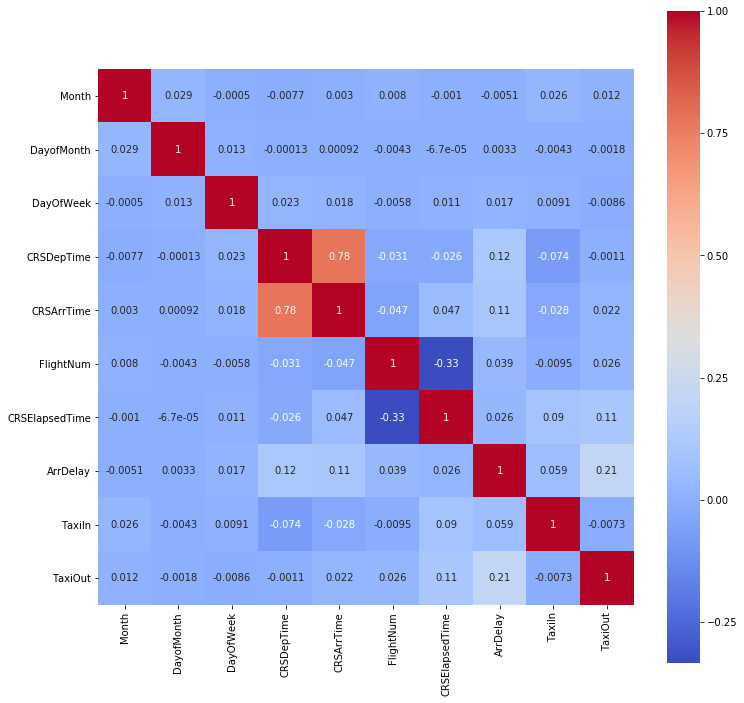

In [318]:
plt.figure(figsize=(12,12))
sns.heatmap(sample_new.corr(), cmap='coolwarm', square=True, annot=True)

In [317]:
sample_new = sample_new.drop('Distance', axis=1)

In [319]:
# creating the y variable for classification. 
# Required criterion: A flight only counts as late if it is more than 30 minutes late.

sample_new['y'] = np.where(sample_new['ArrDelay']>30, 1, 0)

# Creating X and y

X = sample_new.drop('y', axis=1)
y = sample_new.y

# checking for null values 



In [321]:
X.isnull().sum()

# train test split 
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=.3, random_state=101)

In [325]:
# dropping except for UniqueCarrier, which has 20 values and may be worth dummying
X_tr = X_tr.drop(['UniqueCarrier', 'TailNum','Origin','Dest'], axis=1)
X_ts = X_ts.drop(['UniqueCarrier', 'TailNum','Origin','Dest'], axis=1)

In [326]:
start = time()
# Trying Random Forest 
rfc = RandomForestClassifier(n_estimators=3)
rfc.fit(X_tr, y_tr)
score = rfc.score(X_ts, y_ts)
print("Score:", score)
print("Elapsed time:", round(time()-start), "seconds")

Score: 1.0
Elapsed time: 3 seconds


In [328]:
lr = LogisticRegression(C=1e9)
fit = lr.fit(X_tr, y_tr)

In [330]:
# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y = lr.predict(X_ts)

print('\n Accuracy')
print(pd.crosstab(pred_y, y_ts))

print('\n Percentage accuracy')
print(lr.score(X_tr, y_tr))

Coefficients
[[-5.27052239e-02 -2.42045240e-02 -1.09136129e-01 -5.85305135e-04
  -4.69773362e-04 -1.35449322e-04 -4.20550251e-03  4.90758588e-01
  -2.53643046e-02 -1.18379804e-02]]
[-10.99020493]

 Accuracy
y           0      1
row_0               
0      154831   1145
1        1020  66350

 Percentage accuracy
0.9906934439630194


In [331]:
GBC = GradientBoostingClassifier()
GBC.fit(X_tr, y_tr)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [334]:
# Display.
pred_y = GBC.predict(X_ts)

print('\n Accuracy')
print(pd.crosstab(pred_y, y_ts))

print('\n Percentage accuracy')
print(GBC.score(X_tr, y_tr))


 Accuracy
y           0      1
row_0               
0      155851      0
1           0  67495

 Percentage accuracy
1.0


In [335]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [336]:
neighbors.fit(X_tr, y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [337]:
y_pred = neighbors.predict(X_ts)

In [338]:
print(pd.crosstab(y_pred, y_ts))

y           0      1
row_0               
0      154123  12602
1        1728  54893


In [339]:
print('\n Percentage accuracy')
print(neighbors.score(X_tr, y_tr))


 Percentage accuracy
1.0
